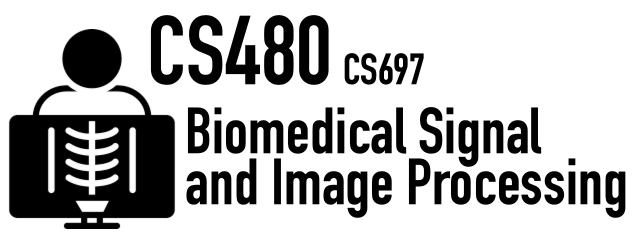

# Assignment 2

**Yiming Shen**

**02/27/2021**

**HW Topic: MEG Data Processing**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we will be using the EEG/MEG analysis library MNE
# documentation is available here: https://mne.tools/stable/index.html
!pip install -U mne

Requirement already up-to-date: mne in c:\programdata\anaconda3\lib\site-packages (0.22.0)


In [3]:
import mne # let's import MNE

# .. and the sample dataset
from mne.datasets import sample

# These data were acquired with the Neuromag Vectorview system at 
# MGH/HMS/MIT Athinoula A. Martinos Center Biomedical Imaging. 
# EEG data from an electrode cap was acquired simultaneously with the MEG. 

### EXPERIMENT DESCRIPTION ###
# In this experiment, checkerboard patterns were presented to the subject into
# the left and right visual field, interspersed by tones to the left or right ear.
# The interval between the stimuli was 750 ms. Occasionally a smiley face was 
# presented at the center of the visual field. The subject was asked to press a 
# key with the right index finger as soon as possible after the appearance of the face.

In [4]:
# and let's load it!
data_path = sample.data_path()
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')

Opening raw data file C:\Users\sym05\mne_data\MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


### **Task 1:** How many EEG channels were used when acquiring the data? [15 Points]


In [5]:
# Hint: You can use raw.info or raw.ch_names to figure this out!
# TODO: YOUR ANSWER

In [6]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [7]:
len(raw.ch_names)

376

Based on above information, we can find:

There are **376** channels (204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG).

### **Task 2:** Let's look at some channels! [20 Points]

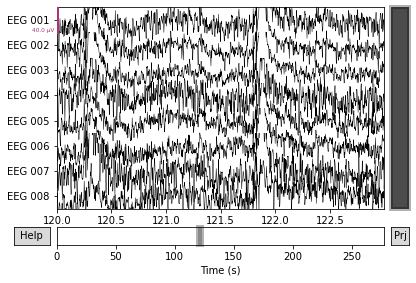

In [8]:
# the code below plots EEG channels 1-8 for 3 seconds after 2 minutes
chs = ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
ecg1to8 = raw.plot(order=chan_idxs, start=120, duration=3)

In [9]:
# TODO please plot EEG channels 50-60 for 1 second after 200 seconds.

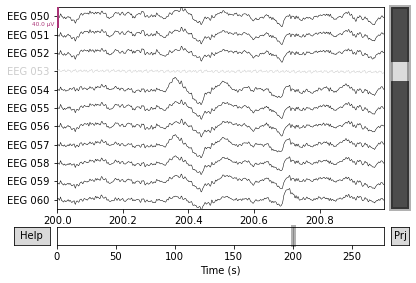

In [10]:
chs_50to60 = ['EEG 050', 'EEG 051', 'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 
              'EEG 056', 'EEG 057', 'EEG 058', 'EEG 059', 'EEG 060']

chan_idxs_50to60 = [raw.ch_names.index(ch) for ch in chs_50to60]

ecg50to60 = raw.plot(order=chan_idxs_50to60, start=200, duration=1)

### **Task 3:** How long between event and brain activity? [30 Points]

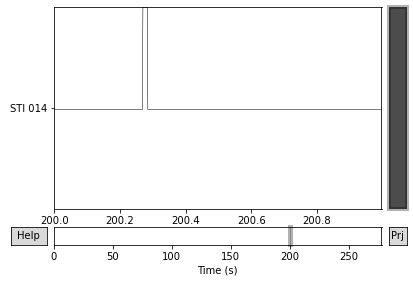

In [11]:
# the following code plots the stimulus channel for the same time
chan_idxs = [raw.ch_names.index('STI 014')]
stim = raw.plot(order=chan_idxs, start=200, duration=1)

In [12]:
# TODO Please combine the last two plots into one.
# the plot should show EEG channels 50-60 and the stimulus channel together.

In [13]:
chan_idxs_50to60

[364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374]

In [14]:
chan_idxs

[312]

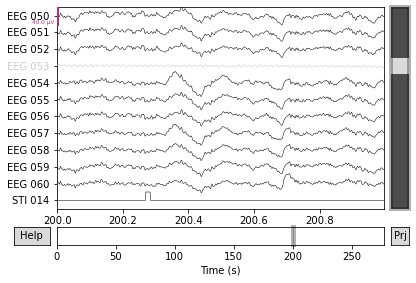

In [15]:
chan_idxs_combine = chan_idxs_50to60 + chan_idxs
stim_ecg50to60 = raw.plot(order=chan_idxs_combine, start=200, duration=1)

In [16]:
# TODO Please estimate the time between stimulus and brain activity.
# TODO: YOUR ANSWER

The spike of STI is about 200.25;

The EEG is about 200.45;

So the time between stimulus and brain activity ia about 200.45 - 200.25 = **0.2s**. 

### **Task 4:** Localize different brain waves for different stimuli! [35 Points]

In [17]:
# the following code groups all stimuli together
# and allows the visualization of average brain activity per stimuli.
events = mne.find_events(raw, stim_channel='STI 014')
event_dict = {'auditory/left': 1, 
              'auditory/right': 2, 
              'visual/left': 3,
              'visual/right': 4, 
              'face': 5, 
              'button': 32}

picks = mne.pick_types(raw.info, eeg=True)

epochs = mne.Epochs(raw, events, event_id=event_dict, picks=picks,
                    preload=True)

320 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 320 events and 421 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


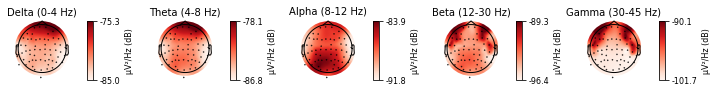

In [18]:
# here we see the average localized brain activity for the right visual stimuli
visual_activity = epochs['visual/right'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


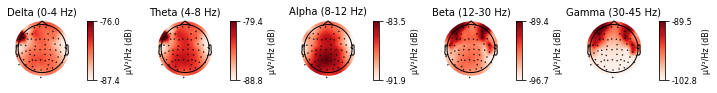

In [19]:
# here we see the average localized brain activity for the shown 'face'
face_activity = epochs['face'].plot_psd_topomap()

In [20]:
# TODO Please visualize the average brain activity when the subject pushes the button

    Using multitaper spectrum estimation with 7 DPSS windows


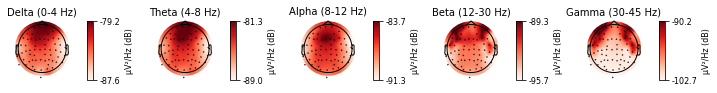

In [21]:
button_activity = epochs['button'].plot_psd_topomap()

In [22]:
# TODO Which difference do you see between the visual/right, the face, and the button event?
# TODO Which brain region seems active during the button event?
# Hint: visual/right and face seem more similar to the button event. Think about why?
# TODO: YOUR ANSWER

##### Which difference do you see between the visual/right, the face, and the button event?
|     | visual/right | face | button |
| ----------- | ----------- | ----------- |----------- |
| Delta  | -75.3 to -85.0 | -76.0 to -87.4  | -79.2 to -87.6 |
| Theta  | -78.1 to -86.8 | -79.4 to -88.8  | -81.3 to -89.0 |
| Alpha  | -83.9 to -91.8 | -83.5 to -91.9  | -83.7 to -91.3 |
| Beta   | -89.3 to -96.4 | -89.4 to -96.7 | -89.3 to -95.7 |
| Gamma  | -90.1 to -101.7 | -89.5 to -102.8| -90.2 to -102.7|

We can find the Alpha and Beta of these three activities are not changend a lot. And the Delta, Theta and **Gamma** are pretty different. 

Delta_range = Delta_lower - Delta_upper (9.7, 11.4, 8.4), sd(Gamma_range) = 0.8504901

Theta_range(8.7, 9.4, 7.7), sd(Theta_range)= 0.8544004

Gamma_range(11.6, 13.3, 12.5), sd(Delta_range)=1.504438




##### Which brain region seems active during the button event? Visual/right and face seem more similar to the button event. Think about why?
Visual/right event seems more actively in **Parietal** and **Ocipital** areas.

Face event seems more actively in **Parietal**, **Ocipital** and **Central** areas.

Button event seems more actively in **Front** and **Central** areas.

Visual/right and face seem more similar to the button event might be working together to control some part joint activity of our body.

##### **Bonus Task:** What type of event happened in Task 3? [33 Points]

In [23]:
# TODO Please go back to Task 3. Can you figure out which event type happened?

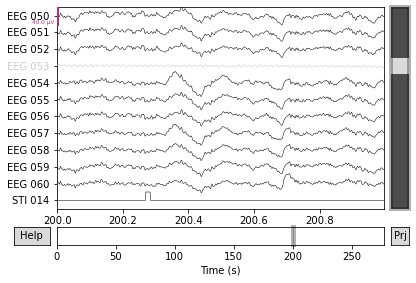

In [24]:
chan_idxs_combine = chan_idxs_50to60 + chan_idxs
stim_ecg50to60 = raw.plot(order=chan_idxs_combine, start=200, duration=1)

In [25]:
event_dict

{'auditory/left': 1,
 'auditory/right': 2,
 'visual/left': 3,
 'visual/right': 4,
 'face': 5,
 'button': 32}

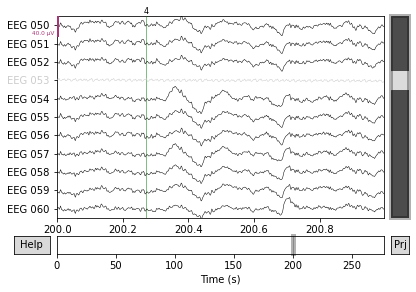

In [26]:
chan_idxs_trace = raw.plot(order=chan_idxs_50to60,start=200,duration=1,events=events,
                          event_color={1: 'black', 2: 'yellow', 3: 'red', 4: 'green', 5: 'blue', 32: 'brown'})

We can find the happend event is **'visual/right'**.

In [27]:
# You did it!!
#
# ┈┈┈┈┈┈▕▔╲
# ┈┈┈┈┈┈┈▏▕
# ┈┈┈┈┈┈┈▏▕▂▂▂
# ▂▂▂▂▂▂╱┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▉▉▉▉▉┈┈┈▕▂▂▂▏
# ▔▔▔▔▔▔╲▂▕▂▂|
#